# Project 2 - Can you hear the size of a reservoir?

By Mariane Udtian, Marius Skårdal & Fisayo Togun

Marius Skårdal was responsible for exercise 2, exercise 3 part 1 and exercise 4 part 1. 

### Introduction

In a time gap of many millions of years, organic material such as oil and gas has broken down and transformed on the seabed. The probability of finding oil and producable gas increases as the reservoir contains both porosity and permeability. The first referce to small cavities in the rock that can be filled with oil, gas as well as water. The second can be defined as a measure of how easily fluids flow through the rock. In this project we will investigate the behavior of fluid inside a reservoir. As mass, electric charge and energy is conserved, we will start by introducing the one-dimensional continuity equation:

$$\frac{\partial q(x, t)}{\partial t} A(x) =  - \frac{\partial(J(x, t)A(x))}{\partial x} + \dot{\sigma}(x, t)A(x)$$

In the rest of the project, we will also need the given boundary conditions:
$$\frac{\partial p}{\partial t} = \eta \frac{e^{-2y}}{r^2_w} \frac{\partial^2 p}{\partial y^2}$$
$$\frac{\partial p}{\partial y}(y=y_e) = \frac{Q \mu}{2 \pi hk}$$
$$p(y=y_e) = p_{init}$$

## Exercise 1 - Steady-state solution

### Part 1

In this problem we are dealing with steady states, which means no change in pressure: $$\frac{dP}{dt}=0$$. This implies that the first equation $$\frac{\partial P}{\partial t} = \eta \frac{e^{-2y}}{r^2_w} \frac{\partial^2 P}{\partial y^2} \rightarrow \frac{\partial^2 P}{\partial y^2} = 0$$

2.nd equation is: $$\frac{dP}{dy}|_{y=y_w} = \frac{Q \mu}{2 \pi h k} \equiv \alpha$$
We also know that $$P(y=y_e)=P_{initial}$$

$$  p(y) = A \cdot y + B, (P''(y)=0)$$

$$ P(ye)=p_{init}, \frac{dp}{dy}|_{y=y_w}  \alpha \rightarrow
  P'(y)=A \\    
  P(y_w)= \alpha = A $$
$$ p(y) = \alpha \cdot y + B \newline
   p(ye) = P_i= \alpha \cdot ye + B \newline
   B = P_i - \alpha \cdot ye \newline
   p(y) = \alpha \cdot y + P_i - \alpha \cdot ye = P_i + \alpha(y-ye)
$$

$$\rightarrow p(y) = p_{init} + \alpha (y - y_e)$$

### Part 2

Given in the exercise, we know that $$\frac{d^2 P}{dy^2}=0$$
Thats is, according to Taylor 2.nd order finite difference scheme:
$$\frac{P_{i+1} + P_{i-1} - 2P_i}{\Delta y^2} = 0$$
To enforce fixed pressure: $p_e = p(y_e) = p_{init}$

According to the "lazy" implementation, $p_N = p_e$, where N=4. Using the formula above we get:
$$i=0:   p_1+p_{-1}-2p_0= 0$$
$$i=1:   p_2+p_{0}-2p_1= 0$$
$$i=2:   p_3+p_{1}-2p_2= 0$$
$$i=3:   p_4+p_{2}-2p_2= 0$$
Here, since we know $p_4$ we can re arrange the last equation : $p_2-p_3=-p_e$

We also know the 1.st derivative: $$\frac{dP}{dy}|_{y_w} = \alpha$$.
Taylor 1.st order finite difference read: $$\frac{P_{i}-P_{i-1}}{\Delta y} = \alpha$$
For the first value we get $$i=0: \frac{p_0-p_{-1}}{\Delta y}=\alpha \rightarrow p_{-1} = p_0 - \alpha \Delta y$$

Now, if we put this into equation () we get $$p_1+(p_0- \alpha \Delta y) - 2p_0 = 0 \rightarrow -p_0 + p_1 = \alpha \Delta y$$

Putting all the information above we get the matrix:
$$
\begin{bmatrix}
-1 & 1 & 0 & 0\\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 1 & -2
\end{bmatrix}
= 
\begin{bmatrix}
p_0\\
p_1\\
p_2\\
p_3
\end{bmatrix}
= 
\begin{bmatrix}
\alpha \Delta y\\
0\\
0\\
-p_e
\end{bmatrix}
$$

### Part 3

First of all, the truncation error is the ratio between the approximation and the exact value. A truncation error of 1 therefore indicates no error. The local truncation error for the $$\frac{P_{i+1} + P_{i-1} - 2P_i}{\Delta y^2} = 0$$ is : $$ T_i = \frac{P_{i+1}+ P_{i-1} - 2P_i}{\Delta y^2} - \frac{\partial^2 P}{\partial y^2}|_{y=y_i}$$
For the truncation error at the interior grid, we want to look at the truncation error at $P_i$.

Now, if we use taylor expansion: $$f(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + \frac{f'''(x_0)}{3!}({x-x_0})^3 + \frac{f''''(x_0)}{4!}({x-x_0})^4 + ... = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$


$$f(y_{i+1}) + f(y_{i-1}) - 2f(y_i) = f'(y_0)[\Delta y - \Delta y] + f''(y_0)[\frac{(\Delta y)^2}{2!} + \frac{(\Delta y)^2}{2!}] + f'''(y_0)[\frac{(\Delta y)^3}{3!} + \frac{(\Delta y)^3}{3!}] + f''''(y_0)[\frac{(\Delta y)^4}{4!} + \frac{(\Delta y)^4}{4!}] + f^{(5)}(0) + f^{(6)}(y_0)[\frac{(\Delta y)^6}{6!} + \frac{(\Delta y)^6}{6!}] +...$$ 

Re arrange the equation and we have:
$$f´´(y) = \frac{f(y_{i+1}) + f(y_{i-1}) - 2f(y_i)}{\Delta y^2} + f^{(3)}(y)[\frac{(\Delta y)^2}{12}] + f^{(5)}(y)[\frac{(\Delta y)^6}{360}]...$$
Where $$f^{(3)}(y)[\frac{(\Delta y)^2}{12}]\rightarrow \frac{d^3P}{dy^3} \frac{\Delta y^2}{12}$$ is the truncation error. Note that I skipped the terms after $f^{(3)} $, this is because they are really small, and in most cases don´t make a differance. Note that this is a general formula for the truncation error for the finite difference. 

Now, according to the taylor expansion, the truncation error is given by the third derivative. Accordingliy, we are dealing with a linear function, so the third derivative is zero. Also, we were given that the 2.nd derivative is 0, therefore we know that the higher order derivatives is zero. 

### Part 4

$\cdot$ According to the result found in part 3, one cann see that the numerical error for the "lazy" approximation scales as $\frac{\Delta y^2}{12}$. 

$\cdot$ For the "not-so-lazy" version we want to use taylors formula to derive the boundary condition: $$p_N=2p_e - p_{N-1}$$
Looking at figure 4 and 5, we see that $p_e$ is on the edge the cylindrical reservoir, and found in between of $p_3$ and $p_4$. The distance from $p_e$ to $p_3$ and $p_4$ is given by $\frac{\Delta y}{2}$. Now, if we combain this information with Taylor´s formula, we get:
$$P(y_e + \frac{\Delta y}{2}) = P(y_e) + \frac{dP}{dy}|_{y_e} \frac{\Delta y}{2}$$ 
Note that the left-hand-term is equal to $P_4$, and $P(y_e)=P_e$. Again, using first order finite difference : $\frac{P_{i}-P_{i-1}}{\Delta y}$ for the N=4:
$$P_4 = P_e + \frac{P_{4}-P_{3}} {\Delta y} \frac{\Delta y}{2} = P_e + \frac{P_{4}-P_{3}}{2} \rightarrow \frac{1}{2}P_4 = P_e - \frac{1}{2}P_3 \newline \rightarrow P_4 = 2P_e - P_3$$

Now, if we plug this into the taylor formula we see that the truncation error scales down to $$\frac{d^3P}{dy^3} \frac{\Delta y^2}{24}$$
In order to find the new matrix element, we will plug the "not-so-lazy" method into the 2.nd finite difference formula:$\newline$
i=3:  $$p_4 + p_2 - 2p_3 = 2p_e -p_3 + p_2 = 0 \rightarrow p_2 - 3p_3 = -2p_e$$

The matrix equation we now need to solve for the "not-so-lazy" approch is:
$$
\begin{bmatrix}
-1 & 1 & 0 & 0 \\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 1 & -3  \\
\end{bmatrix}
= 
\begin{bmatrix}
p_0\\
p_1\\
p_2\\
p_3
\end{bmatrix}
= 
\begin{bmatrix}
\alpha \Delta y\\
0\\
0\\
-2p_e
\end{bmatrix}
$$

### Part 5

$\cdot$ Solve the matrix equation multiple times for the boundary condition $y = y_e$ by varying the number of grid points. 

# Exercise 2: Time-dependent solution

### Part 1

$$
\frac{p^{n+1}_{i}-p^n_i}{\Delta t} \: = \: \eta \: \cdot \: \frac{e^{-2y_i}}{r^2_w} \: \cdot \: \frac{p^{n+1}_{i+1}+p^{n+1}_{i-1}-2p^{n+1}_{i}}{\Delta y^2} 
$$

$$
p'(y) \: = \: \frac{p_{i+1}-p_i}{\Delta y}
$$
Now we need to see if we can apply our boundary conditions
$$
\xi_i \: = \: \frac{\eta e^{-2y_i}\Delta t}{r^2_w \Delta y^2}
$$
$$
\beta \: = \: \frac{Q \mu \Delta y}{2 \pi kh}
$$
$$
\frac{p^{n+1}_{i}-p^n_i}{\Delta t} \: = \: \eta \: \cdot \: \frac{e^{-2y_i}}{r^2_w} \: \cdot \: \frac{p^{n+1}_{i+1}+p^{n+1}_{i-1}-2p^{n+1}_{i}}{\Delta y^2} 
$$
$$
\rightarrow p^{n+1}_{i}-p^n_i \: = \: \eta \: \cdot \: \frac{e^{-2y_i}\Delta t}{r^2_w \Delta y^2} \: \cdot \: p^{n+1}_{i+1}+p^{n+1}_{i-1}-2p^{n+1}_{i} 
$$
$$
\rightarrow p^{n+1}_{i}-p^n_i \: = \: \xi_i \: \cdot \: (p^{n+1}_{i+1}+p^{n+1}_{i-1}-2p^{n+1}_{i})
$$
$N \: = 0 \:$

$$
p^{n+1}_{0}-p^n_0 \: = \: \xi_0 \: \cdot \: (p^{n+1}_{1}+p^{n+1}_{-1}-2p^{n+1}_{0})
$$
$$
\frac{p_0-p_{-1}}{\Delta y} \: = \: \alpha
$$
$$
p_0-p_{-1} \: = \: \beta 
$$
$$
p^{n+1}_0-p^n_0 \: = \: \xi_0 (p^{n+1}_1+p^{n+1}_{-1}-p^{n+1}_{0}-p^{n+1}_{0})
$$
$$
p^{n+1}_0-p^n_0 \: = \: \xi_0 (p^{n+1}_1-\beta-p^{n+1}_{0})
$$
$$
p^{n+1}_0-p^n_0 \: = \:  \xi_0p^{n+1}_1-\xi_0\beta-\xi_0p^{n+1}_{0}
$$
$$
-p^n_0 \: = \:  \xi_0p^{n+1}_1-\xi_0\beta-\xi_0p^{n+1}_{0}-p^{n+1}_0
$$
$$
-p^n_0 \: = \:  \xi_0p^{n+1}_1-\xi_0\beta-p^{n+1}_0(\xi_0+1)
$$
$$
p^n_0-\xi_0\beta \: = \:  p^{n+1}_0(\xi_0+1)-\xi_0p^{n+1}_1
$$
N=1
$$
p^{n+1}_{1}-p^n_1 \: = \: \xi_1 \: \cdot \: (p^{n+1}_{2}+p^{n+1}_{0}-2p^{n+1}_{1})
$$
$$
 p^{n+1}_{1}-p^n_1 \: = \: \xi_1 p^{n+1}_{2}+\xi_1 p^{n+1}_{0}-\xi_1 2p^{n+1}_{1}
$$
$$
-p^n_1 \: = \: \xi_1 p^{n+1}_{2}+\xi_1 p^{n+1}_{0}-\xi_1 2p^{n+1}_{1} - p^{n+1}_{1}
$$
$$
 p^n_1 \: = \: -\xi_1 p^{n+1}_{0}+p^{n+1}_{1}(1+2\xi_1) -\xi_1 p^{n+1}_{2}
$$
N=2
$$
p^{n+1}_{2}-p^n_2 \: = \: \xi_2 \: \cdot \: (p^{n+1}_{3}+p^{n+1}_{1}-2p^{n+1}_{2})
$$
$$
p^{n+1}_{2}-p^n_2 \: = \: \xi_2 p^{n+1}_{3}+\xi_2p^{n+1}_{1}-\xi_2 2p^{n+1}_{2}
$$
$$
-p^n_2 \: = \: \xi_2 p^{n+1}_{3}+\xi_2p^{n+1}_{1}-\xi_2 2p^{n+1}_{2} - p^{n+1}_{2}
$$
$$
p^n_2 \: = \:-\xi_2p^{n+1}_{1} + p^{n+1}_{2}(1+2\xi_2) -\xi_2 p^{n+1}_{3}
$$
N=3
$$
p^{n+1}_{3}-p^n_3 \: = \: \xi_3 \: \cdot \: (p^{n+1}_{4}+p^{n+1}_{2}-2p^{n+1}_{3})
$$
Implement the "not so lazy" solution
$$
p_N \: = 2p_i - p_{N-1} \rightarrow 
p_4 \: = 2p_i - p_{3}
$$
$$
p^{n+1}_{3}-p^n_3 \: = \: \xi_3 \: \cdot \: (2p_i - p^{n+1}_{3}+p^{n+1}_{2}-2p^{n+1}_{3})
$$
$$
p^{n+1}_{3}-p^n_3 \: = \: \xi_3 2p_i +\xi_3p^{n+1}_{2}-3\xi_3 p^{n+1}_{3}
$$
$$
-p^n_3 \: = \: \xi_3 2p_i +\xi_3p^{n+1}_{2}-3\xi_3 p^{n+1}_{3} - p^{n+1}_{3}
$$
$$
p^n_3 \: = \: -\xi_3 2p_i -\xi_3p^{n+1}_{2}+p^{n+1}_{3}(1+3\xi_3)
$$
$$
p^n_3 + 2p_i\xi_{N-1} \: = \: -\xi_3p^{n+1}_{2}+p^{n+1}_{3}(1+3\xi_3)
$$
Which gives us the matrix
$$
\begin{bmatrix}
1+\xi_0 & -\xi_0 & 0 & 0\\
-\xi_1 & 1+2\xi_1 & -\xi_1 & 0 \\
0 & -\xi_2 & 1+2\xi_2 & -\xi_2 \\
0 & 0 & -\xi_3 & 1+3\xi
\end{bmatrix}
\begin{bmatrix}
p^{n+1}_0\\
p^{n+1}_1\\
p^{n+1}_2\\
p^{n+1}_3
\end{bmatrix}
= 
\begin{bmatrix}
p^{n}_0\\
p^{n}_1\\
p^{n}_2\\
p^{n}_3
\end{bmatrix}
+
\begin{bmatrix}
-\beta \xi_0\\
0\\
0\\
2p_i\xi_{N_1}
\end{bmatrix}
$$


# Exercise 4: Match model to well test data 

### Part 1

Recall the formula $ \frac{p_n-p_{n-1}}{\Delta y} \: = \alpha $ 

Since we are using the step size $\frac{\Delta y}{2} $ we get 
$
\frac{p_w-p_{0}}{\Delta y/2} \: = \alpha 
$

Which gives us: 
$$
p_w \: = \: p_0 + \frac{\Delta y}{2}\alpha
$$

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special as sc
import scipy.sparse.linalg
import numba as nb
from scipy.misc import derivative
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

#import sympy as sym

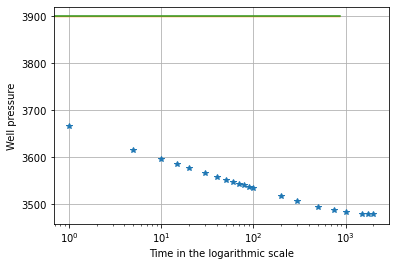

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [113]:



class Project:
    def __init__(self,
                 N,
                 dt,
                 typ="sparse",
                 rw=0.318,
                 re=1000.0,
                 h=11.0,
                 phi=0.25,
                 mu=1.0,
                 ct=7.8e-6,
                 Q=1000.0,
                 k=500,
                 pint=3900.0):
        

            # Unit conversion factors (input units --> SI)
            self.ft_to_m_ = 0.3048
            self.psi_to_pa_ = 6894.75729
            self.day_to_sec_ = 24.*60.*60.
            self.bbl_to_m3_ = 0.1589873

            # Grid
            self.N_ = N
            self.rw_ = rw*self.ft_to_m_
            self.re_ = re*self.ft_to_m_
            self.h_ = h*self.ft_to_m_
            self.n = N-1

            # Rock and fluid properties
            self.k_ = k*1e-15 / 1.01325
            self.phi_ = phi
            self.mu_ = mu*1e-3
            self.ct_ = ct / self.psi_to_pa_

            # Initial and boundary conditions
            self.Q_ = Q*self.bbl_to_m3_ / self.day_to_sec_
            self.pi_ = pint*self.psi_to_pa_

            # Time control for simulation
            self.dt_ = dt*self.day_to_sec_
            self.diffusivity_ = self.k_/(self.mu_*self.phi_*self.ct_)
            self.ye=np.log(self.re_/self.rw_)
            self.dy=self.ye/self.N_
            self.beta_ = (self.Q_*self.mu_*self.dy)/(2*np.pi*self.k_*self.h_)
            self.alph= (self.Q_*self.mu_)/(2*np.pi*self.k_*self.h_)

            #extra
            self.yi=np.linspace(0,self.ye-self.dy,self.N_)+(self.dy/2)
            self.r=np.linspace(0,self.re_,self.N_)
            self.alpha=1
            self.gen2=np.linspace(start=0,stop=self.ye,num=self.N_+1)
            self.y_i2=(self.gen2[0]+self.gen2[1])/2
            self.y2 = np.linspace(self.dy/2, self.ye-self.dy/2, num=self.N_)
            
            #matrix variables for basic
            self.typ=typ
            self.matrix, self.d=self.matrixsolver()
            
#Define variable xi

    def alpha(self, i):
        return((self.Q_*self.mu_*self.yi)/(2*np.pi*self.h_*self.k_))
        
    def p_e(self, i):
        pi = self.pi_
        return (pi)   
    
    def beta3(self, i):
        beta2=((self.Q_*self.mu_*self.yi[i])/(2*np.pi*self.h_*self.k_))
        return (beta2)
    
    def beta(self, i):
        beta2=((self.Q_*self.mu_*self.yi[i])/(2*np.pi*self.h_*self.k_))
        return (beta2)

    
    def y_gen(self, i):
    
        y = np.log(self.re_/self.rw_)
        return (self.yi-y)
    
    def analytic(self, y_gen):
        p_y=self.pi_+(self.alpha*(y_gen-self.ye))
        return p_y

    def lazy(self,):
        a= np.ones(self.N_-1)
        b= np.repeat(-2, self.N_)
        c= np.ones(self.N_-1)
        d=np.ones(self.N_-1)
        b[0]=-1
        A=np.diag(a,k=-1)+np.diag(b,k=0)+np.diag(c,k=1)
        
        b = np.zeros(self.N_)
        b[0]= self.alpha*self.dy
        b[1:-1] = 0
        b[-1] = -self.pi_
        return (np.linalg.solve(A, b))

    def not_so_lazy(self):
        a2= np.ones(self.N_-1)
        b2= np.repeat(-2, self.N_)
        c2= np.ones(self.N_-1)
        d2=np.ones(self.N_-1)
        
        b2[0]=-1
        b2[-1]=-3
        A2=np.diag(a2,k=-1)+np.diag(b2,k=0)+np.diag(c2,k=1)
        
        b2 = np.zeros(self.N_)
        b2[0]= self.alpha*self.dy
        b2[-1] = -2*self.pi_
        return (np.linalg.solve(A2, b2))
        
    def error_l(self):
        ab1=self.lazy()
        ab2=self.analytic(self.y2)
        abs_err=abs(ab1 - ab2)
        return abs_err    

    def plot(self):
        y_gen=np.linspace(0,stop=self.ye,num=1000)
        r_a=self.rw_*np.exp(y_gen)
        p_y=self.analytic(y_gen)
        B1=self.lazy()
        B2=self.not_so_lazy()
        plt.figure(facecolor='w')
        r=self.rw_*np.exp(self.y2)
        plt.plot(r_a, p_y, label='analytical')
        plt.scatter(r, B1, label='lazy approx')
        plt.scatter(r, B2, label='not so lazy')
        plt.ylabel("Pressure")
        plt.xlabel("Distance r")
        plt.title(self.N_)
        plt.legend()
        plt.grid()

    def zeta(self,i):
        zeta2=(self.diffusivity_*((np.exp(-2*self.yi[i]))*self.dt_))/(self.rw_*self.rw_*self.dy*self.dy)
        return(zeta2)
    
    def r_y(self, i):
        y = np.log(self.re_/self.rw_)
        ry = self.rw_*np.exp(y)
        return (ry)
    
    def matrixsolver(self):
        d=np.zeros(self.n+1)
        #for i in range(1, self.n+1):
        d[0]= -self.beta_*self.zeta(0)
        d[1:-1] = 0
        d[-1] = 2*self.pi_*self.zeta(self.N_-1)
        A = np.zeros((self.n+1, self.n+1))
        A[0, 0] = 1+self.zeta(0)
        A[0, 1] = -self.zeta(0)
        A[self.n, self.n-1] = -self.zeta(self.n)
        A[self.n, self.n] = 1+3*self.zeta(self.n)
        for i in range(1, self.n):
            A[i, i-1] = -self.zeta(i)
            A[i, i] = 1+2*self.zeta(i)
            A[i, i+1] = -self.zeta(i)
        ############for basic matrix
        return(A,d) 
    
    
    #@nb.jit(nopython=True)
    def thomas_algorithm(self,l, d, u, r):
    
        # Allocate memory for solution
        solution = np.zeros_like(d)
        n = len(solution)

        # Forward elimination
        for k in range(1, n):
            xmult = l[k] / d[k-1]
            d[k] = d[k] - xmult*u[k-1]
            r[k] = r[k] - xmult*r[k-1]

        # Back-substitution
        solution[n-1] = r[n-1] / d[n-1]
        for k in range(n-2, -1, -1):
            solution[k] = (r[k]-u[k]*solution[k+1])/d[k]

        return solution

    def one_time_step(self,p_old):
        
        if self.typ=="sparse":
            rhs=p_old+self.d
            A_sparse = csc_matrix(np.matrix(self.matrix))
            return scipy.sparse.linalg.spsolve(A_sparse,rhs)
        elif self.typ=="basic":
            rhs=p_old+self.d
            return np.linalg.solve(self.matrix,rhs)
        elif self.typ=="thomas":
            rhs=p_old+self.d
            i=np.arange(self.N_)
            a= -self.zeta(i)
            b= 1+((2)*(self.zeta(i)))
            b[0]=1+((self.zeta(0)))
            b[-1]= 1+((3)*(self.zeta(-1)))
            c= -self.zeta(i)
            return (self.thomas_algorithm(a,b,c,rhs))

    def pressure_solver(self,plot=True,tfinal=0.01*24*3600,plot_well=True):
        
        self.yi_2=np.linspace(self.dy/2, self.ye-self.dy/2, num=self.N_)
        self.calc1 = (self.Q_*self.mu_)/(4*np.pi*self.k_*self.h_)

        p_old=np.repeat(self.pi_,self.N_)
        self.t=0
        
        self.r=self.rw_*np.exp(self.yi_2)
        while self.t <= tfinal:
            
            p_new=self.one_time_step(p_old)
            self.t = self.t+self.dt_
            p_old=p_new
            #print(p_old)
        if plot:
            line_eq=self.pi_+self.calc1*sc.expi(-(self.r*self.r)/(4*self.diffusivity_*self.t))
            plt.figure(facecolor='w')
            #p_new=np.append(p_new,self.pi_)######new
            plt.plot(self.r,p_new, label='analytical solution', color='orange')######manipulate r to have same distance as p_new
            plt.scatter(self.r,line_eq, label='line equation solution')
            plt.legend()
            plt.grid()
            plt.show()
            plt.close()
        #if plot:
        #   ya=np.linspace(0,self.ye,100)#######2
        #   plt.plot(ya,self.P(ya))
        elif plot_well:
            time_pressure_1=np.linspace(0,(tfinal),len(p_new) )
            time_pressure_2=np.linspace(0,(tfinal),len(self.line_eq))
            df = pd.read_csv('well_bhp.dat')
            wd= list(df.applymap(lambda x: x.split("\t")).values.flatten())
            fg=np.array(wd,dtype=float)
            plt.plot(fg[:,:-1],fg[:,1:], '*')
            plt.plot(time_pressure_2,self.line_eq*(1/self.psi_to_pa_))
            plt.plot(time_pressure_1, p_new*(1/self.psi_to_pa_))
            #plt.scatter(well_pressure)
            plt.grid()
            plt.xscale("log")
            plt.xlabel("Time in the logarithmic scale")
            plt.ylabel("Well pressure")
            plt.show()
            plt.legend()
            plt.close()
            


N=4
dt=0.01
#typ= "basic"
tfinal=(0.01*24*3600)
pint=3000
k=500
re=1000
typ="sparse"
#p_i=np.repeat(pi,N)
t=Project(N, dt, typ, pint ,k ,re)
t.pressure_solver(plot=False,plot_well=True)
#testings.p_e(1)
#testings.alpha(1)

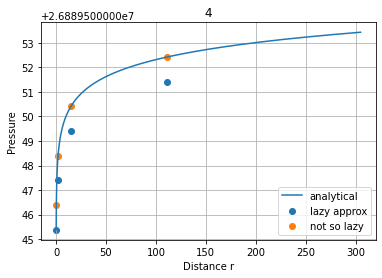

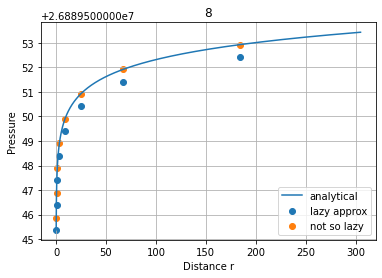

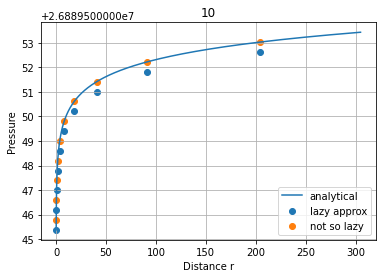

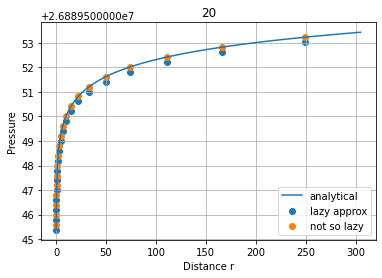

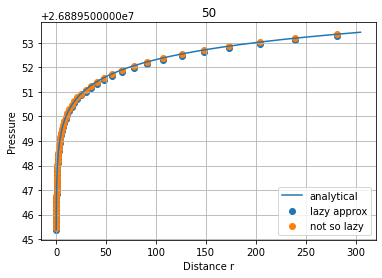

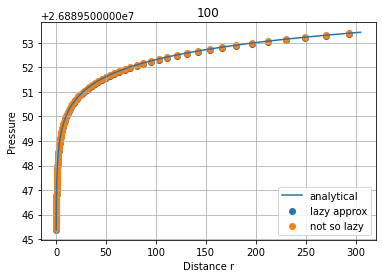

In [ ]:
#Compare the lazy method and the not so lazy method against the analytical solution, with different grid points
N=[4, 8, 10, 20, 50, 100]

for i in N:
    f=Project(i,dt=0.01)
    f.plot()

According to the plot, one can see that the lazy approximation is far from the analytical solution for small grid points. The not so lazy approximatio on the other hand seems to be in good agreement with the analytical solition, even for smaller values of grid points. Incresing the value of gridpoints, seems to improve both approximation. Over all, the not so lazy approximation seems to be a good fit with the analytical solution.

In [ ]:
yk=Project(4, 0.1)

q=yk.not_so_lazy() #/6894.75729
Project(4, 0.1).analytic(5)

26889550.377540823

0.33556079119443893
0.11185359209775925
0.03728440776467323
0.012428052723407745
0.004142601042985916
0.001384001225233078


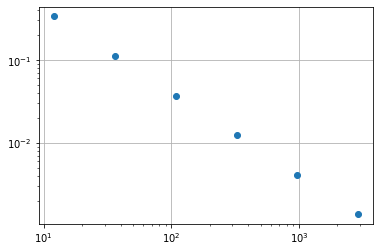

In [ ]:
N=[4*3**i for i in range(1,7)]
err=[]
ii=1
for i in N:
    f=Project(i,dt=0.01)
    e=f.error_l()
    print(e[ii])
    err.append(e[ii])
    ii = int(i/3)
plt.plot(N,err, 'o')
plt.xscale('log')
plt.yscale('log')
plt.grid()

In this plot, we compare the numerical error for the lazy method at a certin point in the resservoir. The "not so lazy" approximation is not included in this plot, as the numerical error is 0. According to our model, the numerical error scales as a factor of 10. Increasing the value of grid points with a value of 10, decreases the numerical error by a factor of 10. 

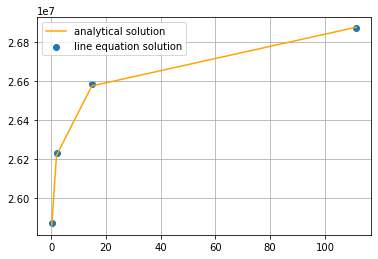

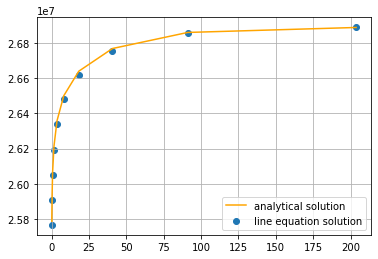

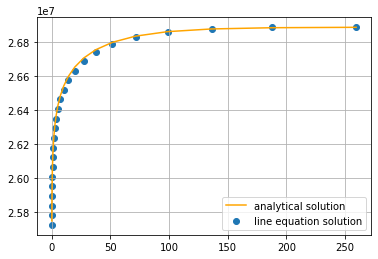

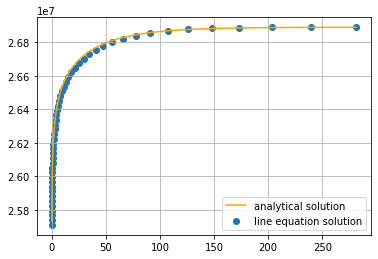

In [108]:
N=[4, 10, 25, 50]

g=1
for g in N:
    g=Project(g,dt=0.01) # Try different values for dt
    g.pressure_solver(plot=True)

When dt increases, our analytical solution exceeds the boundary of the line equation. 
We see that for a lower dt, our line equation fits neatly to that of the analytical, which is to be expected as the analytical solution
has not made a significant change over time.

In [ ]:
#n=3

N=4
dt=0.01
typ= "basic"
testings1=Project(N, dt, typ)
A=testings1.matrixsolver(typ)[0]
print(A)

b=testings1.matrixsolver(typ)[1]
print(b)
#np.linalg.solve(A,b)

TypeError: matrixsolver() takes 1 positional argument but 2 were given

In [ ]:
print(testings.matrixsolver(1)[1])


[-1.51755591e+07  0.00000000e+00  0.00000000e+00  2.36906409e+02]


In [ ]:
# solve the linear equations
y = np.linalg.solve(A, b)
#print(y/6894.75729)

In [ ]:
#Not so lazy approximation
n=4
A2 = np.zeros((n+1, n+1))
A2[0, 0] = -1
A2[n, n-1] = 1
A2[0, 1] = 1
A2[n, n] = -3

for i in range(1, n):
    A2[i, i-1] = 1
    A2[i, i] = -2
    A2[i, i+1] = 1

print(A2)

[[-1.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -3.]]


In [ ]:
b2 = np.zeros(n+1)
b2[0]= testings.alpha(1) #800000 #testings.beta
b2[1:-1] = 0
b2[-1] = -2*testings.p_e(1) #fixed pressure p_e=p_init
#print(b2)

# solve the linear equations
y2 = np.linalg.solve(A2, b2)
#print(y2/6894.75729)

TypeError: 'int' object is not callable

In [ ]:
#for the special case N = 4, the matrix equation we need to solve each time step is
n = 3 #Vary number of grid points
A = np.zeros((n+1, n+1))
A[0, 0] = 1+testings.zeta(0)
A[0, 1] = -testings.zeta(0)
A[n, n-1] = -testings.zeta(3)
A[n, n] = 1+3*testings.zeta(3)
for i in range(1, n):
    A[i, i-1] = -testings.zeta(i)
    A[i, i] = 1+2*testings.zeta(i)
    A[i, i+1] = -testings.zeta(i)
#print(np.round(A, 2))
print(A)

[[ 5.28702460e+03 -5.28602460e+03  0.00000000e+00  0.00000000e+00]
 [-9.42633218e+01  1.89526644e+02 -9.42633218e+01  0.00000000e+00]
 [ 0.00000000e+00 -1.68095582e+00  4.36191165e+00 -1.68095582e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.99757363e-02  1.08992721e+00]]


In [ ]:
A = testings.matrixsolver(1)[0]
b = testings.matrixsolver(1)[1]
y = np.linalg.solve(A, b)
y

array([51986532.54842785, 51996654.34930449, 52558386.82281415,
       84387084.2490705 ])

In [ ]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
AA = csc_matrix(np.matrix(A))
bb = b
x = spsolve(AA, bb)
x

array([51986532.54842788, 51996654.34930452, 52558386.82281418,
       84387084.24907053])

[0 1 2 3]
[-5.28602460e+03 -9.42633218e+01 -1.68095582e+00 -2.99757363e-02]
[5.28702460e+03 1.89526644e+02 6.04286747e+00 1.11990295e+00]
[-5.28602460e+03 -9.42633218e+01 -1.68095582e+00 -2.99757363e-02]
[-1517555.90643587        0.                0.         90400302.86630537]


In [ ]:


N=4
d=testings.matrixsolver(4)[1]
i=np.arange(N)
a= -testings.zeta(i)

b= 1+((i+1)*(testings.zeta(i)))
c= -testings.zeta(i)

@nb.jit(nopython=True)
def thomas_algorithm(l, d, u, r):
    """
    Solves a tridiagonal linear system of equations with the Thomas-algorithm.

    The code is based on pseudo-code from the following reference:

        Cheney, E. W., & Kincaid, D. R.
        Numerical mathematics and computing, 7th edition,
        Cengage Learning, 2013.

    IMPORTANT NOTES:
        - This function modifies the contents of the input vectors l, d, u and rhs.
        - For Numba to work properly, we must input NumPy arrays, and not lists.

    :param l: A NumPy array containing the lower diagonal (l[0] is not used).
    :param d: A NumPy array containing the main diagonal.
    :param u: A NumPy array containing the upper diagonal (u[-1] is not used).
    :param r: A NumPy array containing the system right-hand side vector.
    :return: A NumPy array containing the solution vector.
    """
    # Allocate memory for solution
    solution = np.zeros_like(d)
    n = len(solution)

    # Forward elimination
    for k in range(1, n):
        xmult = l[k] / d[k-1]
        d[k] = d[k] - xmult*u[k-1]
        r[k] = r[k] - xmult*r[k-1]

    # Back-substitution
    solution[n-1] = r[n-1] / d[n-1]
    for k in range(n-2, -1, -1):
        solution[k] = (r[k]-u[k]*solution[k+1])/d[k]

    return solution
testa=thomas_algorithm(a,b,c,d)
print(testa)
#print(x)
#print(y)

TypeError: matrixsolver() takes 1 positional argument but 2 were given

Kilder:
https://www.cs.auckland.ac.nz/courses/compsci369s1c/lectures/GG-notes/Z-archive2010/CS369-FDM-FEM.pdf